# **# 回帰の手法を学ぼう#1**

**機械学習を活用した回帰の流れは以下の通り**

1.課題把握とゴールの設定

2.必要なライブラリのインポート

3.データセットの準備

4.予測モデルの学習

5.予測モデルの評価

6.予測

**1.課題把握とゴールの設定**

*課題*

・カリフォルニアにある住宅に関するデータから、住宅価格を予測したい。

・住宅価格は、主にどの要素から影響を受けているか知りたい。

*ゴール*

・住宅価格を予測する計算式を決定する。

・住宅に関する各要素が、住宅価格に与える影響度合いについても見解を述べる。

**2.必要なライブラリーのインポート**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
!pip install japanize-matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=6a6bb80f6ab48caa5f9ad151a795530d2a7ebe75d115aa4245fe8af22fca2969
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


**3.データセットの準備**

In [ ]:
df = pd.read_csv('/sample/california_housing_cleansing.csv')
df.head()

,Unnamed: 0,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,8,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,15,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,18,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [ ]:
#取り込むデータの列名がブランクの場合、その列は自動的にunnnamed:数字の列名が割り振られる。
#不要なのでunnamed:0の列を消去する
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [ ]:
df.shape

(18572, 8)

今回の課題は、カリフォルニアの住宅に関するいくつかのデータから住宅価格を予測すること。

したがって、予測モデルにインプットするものは

**説明変数X**　＝　住宅価格以外の全列のデータ

**目的変数y**　＝　住宅価格のデータ

In [ ]:
X = df.drop(columns=['住宅価格']).to_numpy()
y = df['住宅価格'].to_numpy()

このXとyをそれぞれ、学習データとテストデータに分割する。

In [ ]:
#train_test_split関数をインポート
from sklearn.model_selection import train_test_split

#学習データ：テストデータ　＝　7 : 3 に分割する。
#実行ごとに配分されるデータが変わるのを避けたい場合はrandom_stateを指定する。

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#データが7:3に分割されたかデータ数を確認する。
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13000, 7) (5572, 7) (13000,) (5572,)


**4.予測モデルの学習**

重回帰で分析を行う場合、scikit-learnのLinearRegressionクラスを活用できる。

In [ ]:
#linear_modelモジュールのLinearRegressionクラスをインポート
from sklearn.linear_model import LinearRegression

#インポートしたLinerRegressionクラスをインスタンス化してmodelという変数に代入
model = LinearRegression()

#学習データで学習を実行
model.fit(X_train, y_train)

LinearRegression()

**5.予測モデルの評価**

決定係数を用いて予測モデルの評価を行う。

決定係数は回帰予測モデルに対する評価指標の１つ。

最大値を１とし、予測大に対して実際の値の当てはまりが良いほど高い値となる。

また、決定係数によって過学習を察知することも可能。

学習データで算出した決定係数と、テストデータで算出した決定係数を比較し、後者が著しく低い場合は過学習の疑いがある。

In [ ]:
#scoreメソッドを利用し決定係数を出力する。

#学習データを用いた決定係数の算出
model.score(X_train, y_train)

0.5967954005117011

In [ ]:
#テストデータを用いた決定係数の算出
model.score(X_test, y_test)

0.5752388860477959

学習データ0.59

テストデータ0.57

大きな乖離は見られない。過学習も発生していないと判断できる。


---



# **＝＝＝＝＝＝＝＝＝＝＝＝＝＝乖離があると判断される数値は？**

# **＝＝＝＝＝＝＝＝＝＝＝＝＝＝過学習が発生した状況とは？**

**6.予測**

In [ ]:
#ndarray形式でX_newという変数に保持させる。
X_new = np.array([[8, 41, 500, 37, -120, 1, 0.2],
                  [2, 10, 2000, 38, -122, 1.5, 0.5],
                  [1, 25, 1000, 38, -121, 2, 1]])

#予測モデルを利用して、X_newから予測値を算出する。
model.predict(X_new)

array([3.2387497 , 1.42228534, 1.43428255])

それぞれの住宅価格だ出力され予測が完了



---
# **＝＝＝＝＝＝＝＝＝＝＝＝＝＝ここで何をしているのか分かりません。**


**7.設定したゴールに対する考察**

・住宅価格を予測する計算式を決定する。

・住宅に関する各要素が、住宅価格に与える影響度合いについても見解を述べる。

In [ ]:
#住宅価格を予測する計算式の作成
#重回帰予測モデル

#重み
print(model.coef_)
#切片
print(model.intercept_)

[ 4.08110906e-01  6.92312594e-03  1.70628946e-05 -4.04061927e-01
 -4.10380169e-01 -2.08486703e-01  1.69589529e+00]
-34.74453851952332


したがって、住宅かかっくを予測する計算式は

住宅価格

≒所得×0.4081　＋　築年数×0.006923　＋　地域人口×0.00001706　＋　緯度×(-0.4041)　＋　経度×(-0.4104)　＋部屋数/人×(-0.2085)　＋　寝室数×1.696 －　34.74

**予測と同じ結果が得られるかどうか**

In [34]:
X_new = pd.DataFrame(X_new, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数/人', '寝室数/人'])

# DataFrameを表示
X_new

,所得,築年数,地域人口,緯度,経度,部屋数/人,寝室数/人
0,8.0,41.0,500.0,37.0,-120.0,1.0,0.2
1,2.0,10.0,2000.0,38.0,-122.0,1.5,0.5
2,1.0,25.0,1000.0,38.0,-121.0,2.0,1.0


In [52]:
ex_price = 8.0 * 0.4081 + 41.0 * 0.006923 + 500.0 * 0.00001706 + 37.0 * (-0.4041) + (-120.0) * (-0.4104) + 1.0 * (-0.2085) + 0.2 * 1.696 - 34.74
print(ex_price)

#予測と同じ結果になった！

3.2441729999999893


# **＝＝＝＝＝＝＝＝＝＝＝＝＝＝関数で表せるかやってみたけれどできませんでした。関数の使い方、locの使い方が間違っていますか？**

In [83]:
def housing_prices(num):
  X_new.loc[num, '所得'] * 0.4081 + X_new.loc[num, '築年数'] * 0.006923 + X_new.loc[num, '地域人口'] * 0.00001706 + X_new.loc[num, '緯度'] * (-0.4041) + X_new.loc[num, '経度'] * (-0.4104) + X_new.loc[num, '部屋数/人'] * (-0.2085) + X_new.loc[num, '寝室数/人'] * 1.696 - 34.74

print(housing_prices(0))

None


In [80]:
X_new.loc[0, '所得'] * 2

16.0

**各要素が住宅価格に与える影響度合い**

<Axes: >

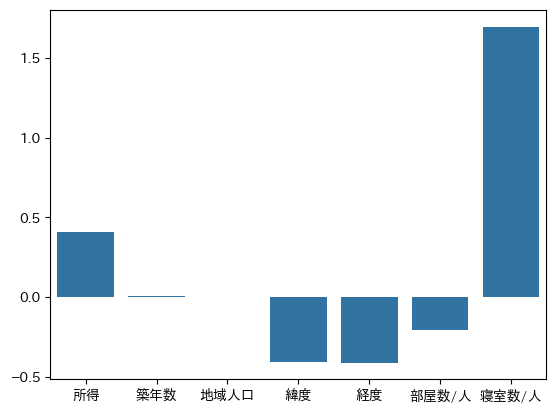

In [45]:
sns.barplot(x = ['所得', '築年数', '地域人口', '緯度', '経度', '部屋数/人', '寝室数/人'], y=model.coef_)


In [46]:
#住宅データの各指標を確認する
df.describe()

,Unnamed: 0,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
count,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000
mean,10358.326890,3.693262,26.983847,1470.392957,35.593231,-119.484929,1.896076,1.936448,0.398033
std,5933.026807,1.570045,11.431815,1162.944307,2.147712,1.980865,0.957902,1.122496,0.242479
min,0.000000,0.499900,1.000000,3.000000,32.540000,-124.300000,0.149990,0.002547,0.000670
25%,5207.750000,2.537275,17.000000,811.000000,33.920000,-121.550000,1.154000,1.490197,0.311688
50%,10371.500000,3.468350,27.000000,1203.000000,34.240000,-118.450000,1.712000,1.905719,0.366856
75%,15268.250000,4.616100,36.000000,1781.000000,37.670000,-117.970000,2.432250,2.239138,0.435936
max,20639.000000,15.000100,51.000000,35682.000000,41.950000,-114.310000,5.000000,55.222222,14.194444


地域人口はスケールが大きい値
寝室数/人はスケールの小さい値

計算式の重みと重要度が必ずしも一致しないことを意味する。
重回帰の計算式の重みから重要度を比較したい場合は、各要素のスケールを統一する必要がある。

事象にてスケール統一による回帰手法の改善に挑戦する。



---
# **＝＝＝＝＝＝＝＝＝＝＝＝＝＝つまり影響度合いってどういうことなのか分かりません。**
# **＝＝＝＝＝＝＝＝＝＝＝＝＝＝3.データセットの前処理で変数dfのUnnamed: 0を削除したはずなのに何故でてくるのだろうか。**